# Pattern classifiers
## General structure of a Bayesian pattern classifier

A pattern classifier can be described as a set of discriminant functions $g_i(x), i = 1,...,c$, where $c$ is the number of patterns (i.e. classes). The classifier maps a sample $x$ to the class $w_i$ if

\begin{equation}
g_i(x) > g_j(x), \forall j \neq i.
\end{equation}

The following image depicts the classification process

![Classificador padrão](images/network.png "Classificador padrão")

Besides, if $g_i(x)$ is replaced by $f(g_i(x))$, where $f(\cdot)$ is a monotonically increasing function, the classification result does not change.

For the pattern classification problem, the following discriminant function is commonly used

\begin{equation} 
g_i(x) = P(w_i|x) = \frac{p(x|w_i)P(w_i)}{p(x)}.
\end{equation}

$p(x|w_i)$ represents the probability density function of feature $x$ for a given class $w_i$ and $P(w_i)$ is the prior probability of class $w_i$ (the term $p(x)$ will disappear when comparing two functions, don't worry).

For two classes, a unique discriminant function can be used:

\begin{equation}
g(x) = g_1(x) - g_2(x),
\end{equation}
and the following decision rule is applied: $w_1$ if $g(x)>0$; $w_2$ otherwise.

With some mathematical manipulation, the discriminant function can then be written as

\begin{align} 
g(x) &= P(w_1|x) - P(w_2|x),\\
g(x) &= \ln{\frac{p(x|w_1)}{p(x|w_2)}} + \ln{\frac{P(w_1)}{P(w_2)}}. 
\end{align}

## Discriminant function for Normal distributions

A d-dimensional Normal distribution can be written as

\begin{equation}
h(x) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp{\left[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right]},
\end{equation}
where $\mu$ is a d-dimensional vector with the mean, $\Sigma$ is a (d x d)-matrix of covariances, $|\Sigma|$ is the determinant e $\Sigma^{-1}$ is the invers.

Let $p(x|w_i) \sim \mathcal{N}(\mu_i,\Sigma_i)$, the discriminant function $g_i(x)$ can then be written as

\begin{equation}
g_i(x) = -\frac{1}{2}(x-\mu_i)^T\Sigma_i^{-1}(x-\mu_i)-\frac{d}{2}\ln{2\pi}-\frac{1}{2}\ln{|\Sigma_i|} + \ln{P(w_i)}.
\end{equation}

## Examples

Assuming a Normal distribution, the following examples show how the decision boundary of a pattern classifier changes with the covariances matrices $\Sigma_i$, assuming balanced classes, that is $\ln{P(w_1)} = \ln{P(w_2)}$. The parameters for the examples are:

\begin{equation} 
\mu_1 = 
\begin{bmatrix}
1 \\
1
\end{bmatrix}
\end{equation}

e

\begin{equation} 
\mu_2 = 
\begin{bmatrix}
3 \\
3
\end{bmatrix}.
\end{equation}

Setting-up imports and utility functions:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from math import log
import matplotlib as mpl
import warnings

In [29]:
# parameters
mu1 = np.array([1,1]).reshape(-1,1)
mu2 = np.array([3,3]).reshape(-1,1)

In [30]:
def sample_distribution(mu1,S1,mu2,S2,n=20):
    """Sample two normal distributions.

        Args:
            mu1: mean of distributuin 1.
            S1 : covariance of distributuin 1.
            mu2: mean of distributuin 2.
            S2 : covariance of distributuin 2.
            n  : number of samples of each class.

        Returns:
            X: X matrix of features.
            y: y matrix of classes.

    """
    # sample
    np.random.seed(50)
    x1, y1 = np.random.multivariate_normal(mu1.ravel(), S1, n).T
    x2, y2 = np.random.multivariate_normal(mu2.ravel(), S2, n).T
    
    # class
    X= np.r_[np.c_[x1,y1], np.c_[x2,y2]]
    Y = np.r_[np.ones(x1.shape),np.zeros(x1.shape)] 
    
    return X,Y

In [31]:
# Visualizing
def plot_separation(X,Y,g):
    """Plots decision boundary."""
    X1, X2 = np.meshgrid(np.arange(start = X[:, 0].min()-.1, 
                                   stop = X[:, 0].max()+.1,step=0.01),
                         np.arange(start = X[:, 1].min()-.1, 
                                   stop = X[:, 1].max()+.1,step=0.01))
    y = g(np.array([X1.ravel(), X2.ravel()])).reshape(X1.shape)
    plt.contourf(X1, X2, y, alpha = 0.5, 
                 cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(Y)):
        plt.scatter(X[Y == j, 0], X[Y == j, 1],
                    c = ListedColormap(('red', 'green'))(i),label=j)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend()
    plt.show()

### Case 1:  $\Sigma_i = \Sigma$




The most simple case occurs when the classes' distributions are independent and with same covariance. For this case, the discriminant function is linear and given by

\begin{equation}
g_i(x) = w_i^Tx + w_{i0},
\end{equation}
onde 
\begin{equation}
w_i = \Sigma^{-1}\mu_i
\end{equation}
e
\begin{equation}
w_{i0} = \frac{-1}{2}\mu_i^T\Sigma^{-1}\mu_i + \ln{P(w_i)}.
\end{equation}

Using:

\begin{equation} 
\Sigma_i = 
\begin{bmatrix}
1 & 0\\
0 & 1.5
\end{bmatrix}.
\end{equation}

In [32]:
# covariances matrices
S1 = np.array([[1,0],[0,1.5]])
S2 = np.array([[1,0],[0,1.5]])

# discriminant functions
S1_inv = np.linalg.inv(S1)
S2_inv = np.linalg.inv(S2)
w1 = np.dot(S1_inv,mu1)
w2 = np.dot(S2_inv,mu2)

w10 = -.5*np.dot(mu1.T, np.dot(S1_inv,mu1))
w20 = -.5*np.dot(mu2.T, np.dot(S2_inv,mu2))

In [33]:
# discriminant function for case 1
def g(x):
    
    g1 = np.dot(w1.T,x) + w10
    g2 = np.dot(w2.T,x) + w20
    
    g = 1.0 * ((g1 - g2 > 0))
    
    return g

In [34]:
# covariances matrices
S1 = np.array([[1,0],[0,1.5]])
S2 = np.array([[1,0],[0,1.5]])

# discriminant functions
S1_inv = np.linalg.inv(S1)
S2_inv = np.linalg.inv(S2)
w1 = np.dot(S1_inv,mu1)
w2 = np.dot(S2_inv,mu2)

w10 = -.5*np.dot(mu1.T, np.dot(S1_inv,mu1))
w20 = -.5*np.dot(mu2.T, np.dot(S2_inv,mu2))

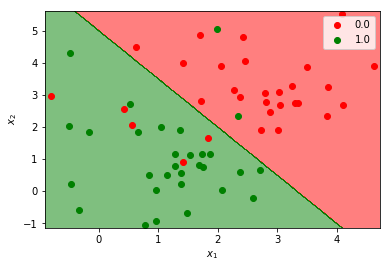

In [35]:
# case 1 plot
X,Y = sample_distribution(mu1,S1,mu2,S2,30)
plot_separation(X,Y,g)

### Caso 2: $\Sigma_i =$ arbritary

The general case occurs when $\Sigma_i$ are arbritary. For this case, the discriminant function is quadratic and given by

\begin{equation}
g_i(x) = x_i^TW_ix_i + w_i^Tx + w_{i0},
\end{equation}
onde 
\begin{align}
W_i &= -\frac{1}{2}\Sigma_i^{-1},\\
w_i &= \Sigma^{-1}\mu_i
\end{align}
e
\begin{equation}
w_{i0} = \frac{-1}{2}\mu_i^T\Sigma^{-1}\mu_i - \frac{1}{2}\ln{|\Sigma_i|}+ \ln{P(w_i)}.
\end{equation}

For this case, an example is formulated using

\begin{equation} 
\Sigma_1 = 
\begin{bmatrix}
0.5 & 0\\
0 & 2
\end{bmatrix},
\end{equation}

\begin{equation} 
\Sigma_2 = 
\begin{bmatrix}
2.0 & 0\\
0 & 2.0
\end{bmatrix}.
\end{equation}

In [36]:
# covariances matrices
S1 = np.array([[.5,0],[0,2]])
S2 = np.array([[2.0,0],[0,2.0]])

# discriminant functions
S1_inv = np.linalg.inv(S1)
S1_det = np.linalg.det(S1)
S2_inv = np.linalg.inv(S2)
S2_det = np.linalg.det(S2)
w1 = np.dot(S1_inv,mu1)
w2 = np.dot(S2_inv,mu2)
W1 = -.5*S1_inv
W2 = -.5*S2_inv

w10 = -.5 * (np.dot(mu1.T, np.dot(S1_inv,mu1)) + log(S1_det)) 
w20 = -.5 * (np.dot(mu2.T, np.dot(S2_inv,mu2)) + log(S2_det))

In [37]:
# discriminant function for general case
def g(x):
    
    g = np.zeros((x.shape[1],))
    for i in range(x.shape[1]):
        xx = x[:,i].reshape(-1,1)
        g1 = np.dot(np.dot(xx.T,W1),xx) + np.dot(w1.T,xx) + w10
        g2 = np.dot(np.dot(xx.T,W2),xx) + np.dot(w2.T,xx) + w20

        g[i] = 1.0 * ((g1 - g2 > 0))
    
    return g

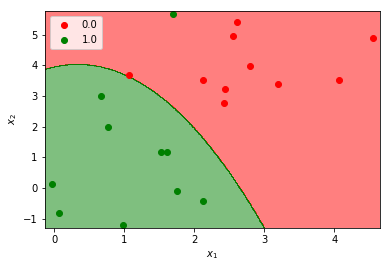

In [38]:
# case 2 plot 
X,Y = sample_distribution(mu1,S1,mu2,S2,10)
plot_separation(X,Y,g)